# Calculate & Plot Sv, Hydrostatic Pressure, Pore Pressure & Effective Stress

In [38]:
# Load libraries
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import integrate
import scipy.optimize

FILEPATH = 'D:/Oil and Gas/'
filename = 'E8-10_Data.csv'

# Import CSV file containing well data
data = np.genfromtxt(FILEPATH+filename, delimiter=',', names=True)

In [39]:
# Data Inspection
print(data.dtype)   # Data type of array elementsprint()

[('Depthm', '<f8'), ('Density_gcc', '<f8')]


In [40]:
# Well Input data
depth = data['Depthm']
density = data['Density_gcc']
density_water = 1. * np.ones_like(density)

In [41]:
# Insert a numpy array field (Porosity) which is to be calculated
from numpy.lib import recfunctions
data = recfunctions.append_fields(data,'Porosity',np.zeros(len(data)),usemask=False)

# Calculate Porosity

In [42]:
# Key variables
matrix_density = 2.7   # in (g/cc)
fluid_density = 1      # in (g/cc)
phi_init = 0.40           # initial porosity
beta = 0.03            # compaction coefficient in 1/MPa

# Calculate Porosity
# Porosity = (matrix_density - log density) / (matrix_density - fluid_density)
data['Porosity'] = (matrix_density - data['Density_gcc']) / (matrix_density - fluid_density)
data['Porosity'] = np.where(data['Porosity']>=0, data['Porosity'], 0)
# data['Porosity'].min()             # QC that the previous condition worked

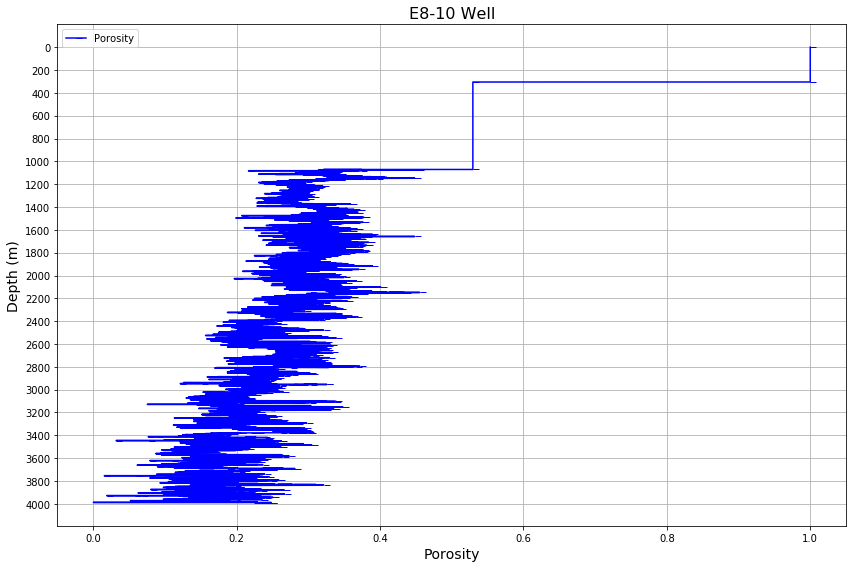

In [43]:
# PLot Porosity log
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(data['Porosity'], data['Depthm'], label="Porosity", color = 'b', marker=1, alpha=1) 
ax1.set_title('E8-10 Well', fontsize = '16')
plt.legend(loc=2)
plt.xlabel('Porosity', fontsize = '14')
plt.ylabel("Depth (m)", fontsize = '14')
ax1.set_xticks(np.arange(data['Porosity'].min(), data['Porosity'].max()+0.1, step=0.2))
ax1.set_yticks(np.arange(data['Depthm'].min(), data['Depthm'].max()+100, step=200))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid()
plt.show();

In [44]:
# Set porosity values to match top of density log
#data['Porosity'][0:4] = 'nan'
#data['Porosity'][0:5]   # All OK

array([       nan,        nan,        nan,        nan, 0.32117647])

In [45]:
# inserting numpy array fields for Sv, Hydrostatic Pressure and Sv Gradient
data = recfunctions.append_fields(data,'Sv(MPa)',np.zeros(len(data)),usemask=False)
data = recfunctions.append_fields(data,'Shydro(MPa)',np.zeros(len(data)),usemask=False)
data = recfunctions.append_fields(data,'Pp(MPa)',np.zeros(len(data)),usemask=False)
data = recfunctions.append_fields(data,'Sigma_Eff(MPa)',np.zeros(len(data)),usemask=False)
data = recfunctions.append_fields(data,'Po(MPa)',np.zeros(len(data)),usemask=False)

# Calculate Sv, Hydrostatic Pressure, Pore Pressure & Effective Stress 

In [49]:
# Calculate Sv, Hydrostatic Pressure, Pore Pressure and Effective Stress 

# Input variables
#porosity = data['Porosity']
g = 9.8 # in (m/s2)

# Compute Sv in MPa
data['Sv(MPa)'] = integrate.cumtrapz(density * 9.81 * 1000 / 1e6, depth, initial=0)

# Compute Shydro in MPa
data['Shydro(MPa)'] = integrate.cumtrapz(density_water * 9.81 * 1000 / 1e6, depth, initial=0)

# Compute Pp in MPa
data['Pp(MPa)'] = data['Sv(MPa)'][-len(data['Porosity']):] - (np.log(data['Porosity'] / phi_init) / -beta)

# Compute sigma_eff in MPa
data['Sigma_Eff(MPa)'] = data['Sv(MPa)'][-len(data['Porosity']):] - data['Pp(MPa)']

# Calculate OverPressure in MPa
data['Po(MPa)'] = data['Pp(MPa)'] - data['Shydro(MPa)']

In [47]:
# Convert the NumPy array to a DataFrame
# df = pd.DataFrame(data)
# df.describe()

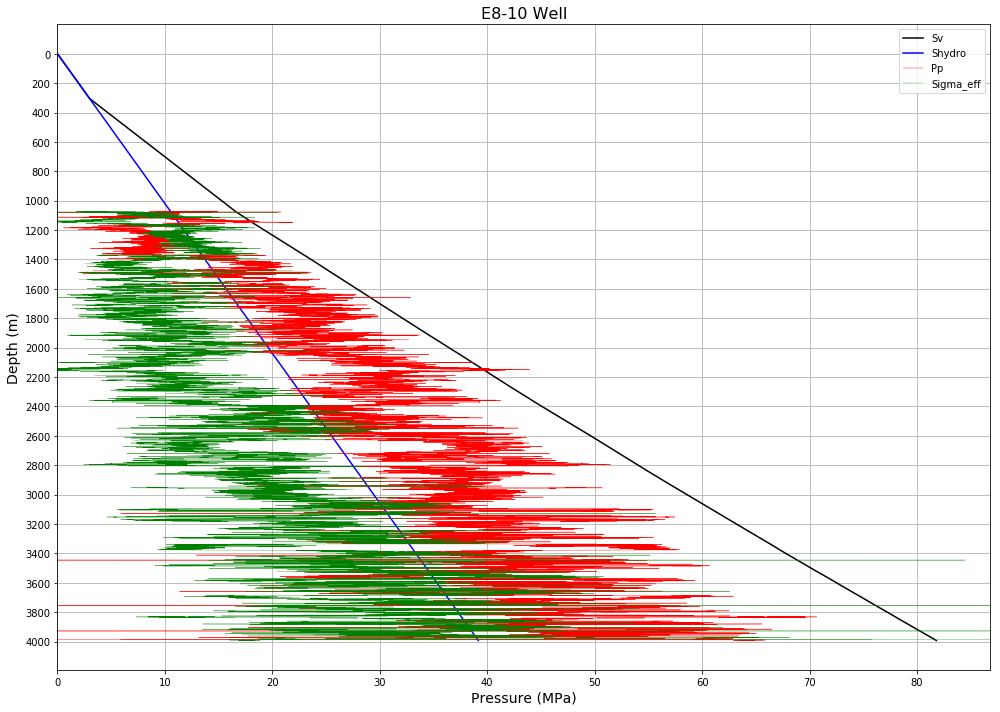

In [48]:
# Plot Pressure Diagram
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)
plt.plot(data['Sv(MPa)'], depth, 'k', label="Sv") 
plt.plot(data['Shydro(MPa)'], depth, 'b', label="Shydro") 
plt.plot(data['Pp(MPa)'], depth, 'r', label="Pp", linewidth=0.4)
plt.plot(data['Sigma_Eff(MPa)'], depth, 'g', label="Sigma_eff", linewidth=0.3);
plt.grid()
ax1.set_title('E8-10 Well', fontsize = '16')
plt.legend(loc=1)
plt.xlabel("Pressure (MPa)", fontsize = '14')
plt.ylabel("Depth (m)", fontsize = '14')
ax1.set_yticks(np.arange(data['Depthm'].min(), data['Depthm'].max()+100, step=200))
ax1.set_xlim(0, data['Sv(MPa)'].max()+5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [115]:
# Dump the NumPy array into a csv file using PANDAS - header info included
FILEPATH = 'D:/Oil and Gas/'
pd.DataFrame(data).to_csv(FILEPATH+"E8-10_data_output.csv")